In [1]:
from glob import glob
import os
from collections import defaultdict
import cv2
from  matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import json
from tqdm import tqdm
from glob import glob

%matplotlib inline

path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition/'

In [2]:
with open('./word2label.json', 'r') as f:
    word2label = json.load(f)

keys = list(word2label.keys())
pretrain_img = defaultdict(list)
dataset_img = defaultdict(list)

for img_path in tqdm(glob(os.path.join(path, 'Pretrain_Common_Modified', '*'))):
    img_name = img_path.split('/')[-1]
    label = img_name.split('_')[0]
    if label in keys: pretrain_img[label].append(img_path)

for img_path in tqdm(glob(os.path.join(path, 'Modified_Thres', '*'))):
    img_name = img_path.split('/')[-1]
    label = img_name[-5]
    if label in keys: dataset_img[label].append(img_path)

100%|██████████| 68804/68804 [00:00<00:00, 256659.30it/s]


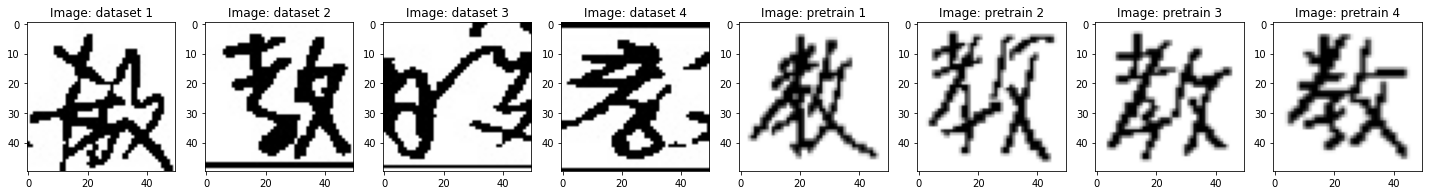

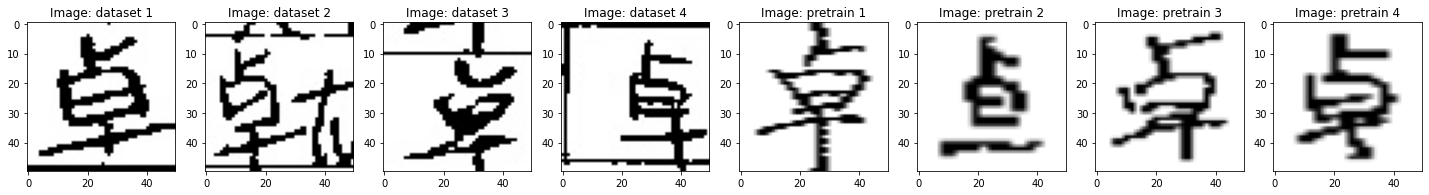

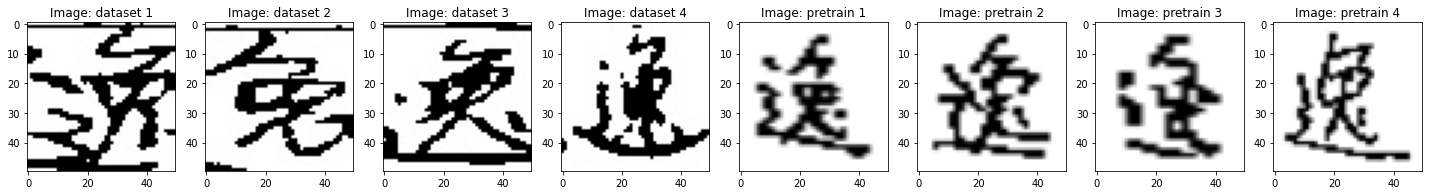

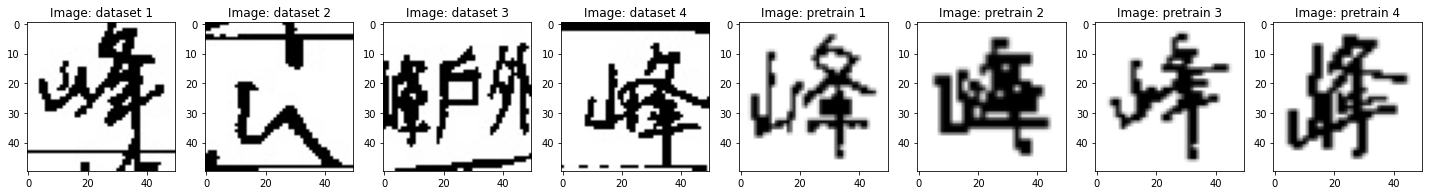

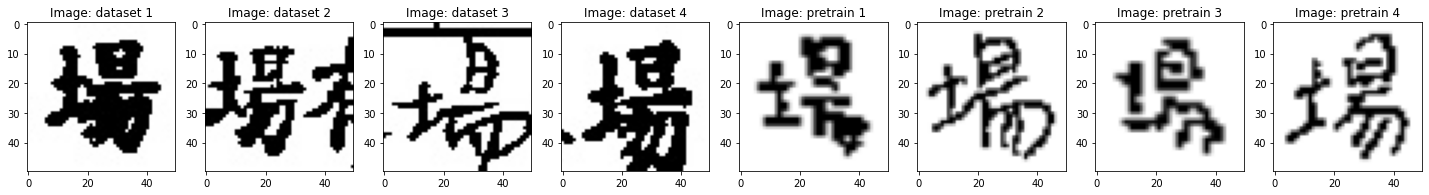

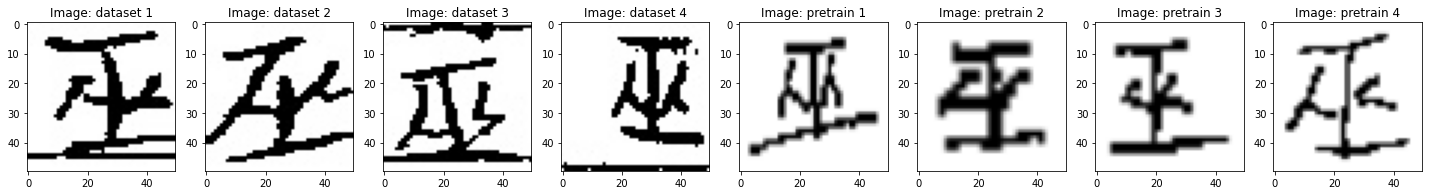

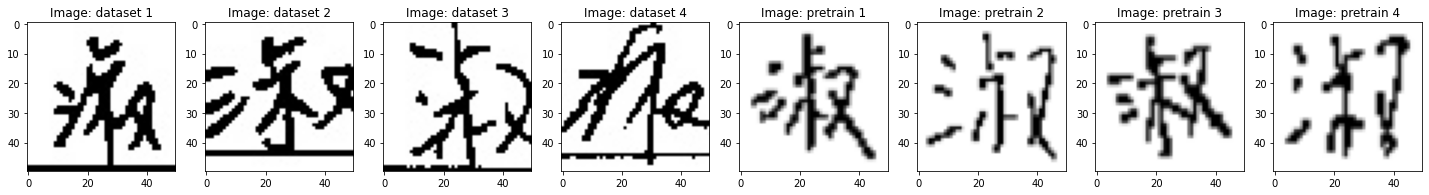

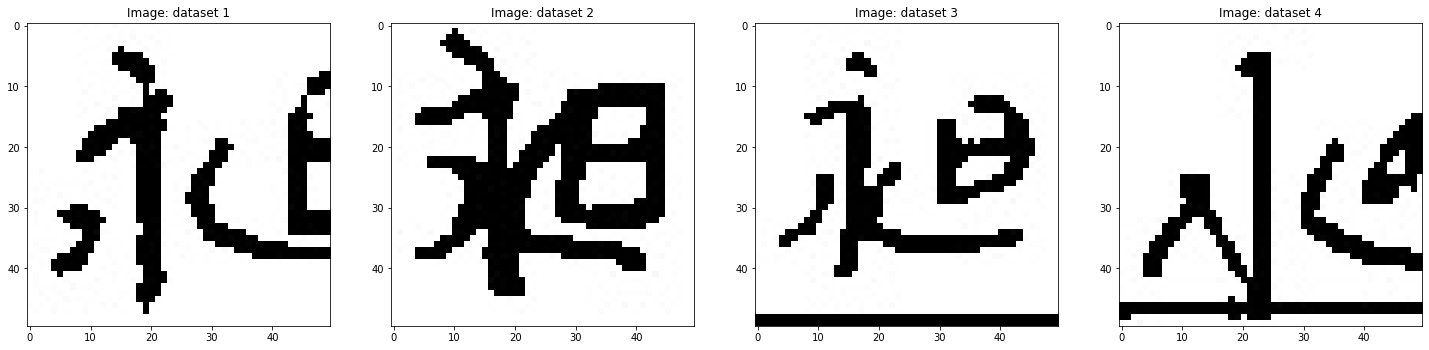

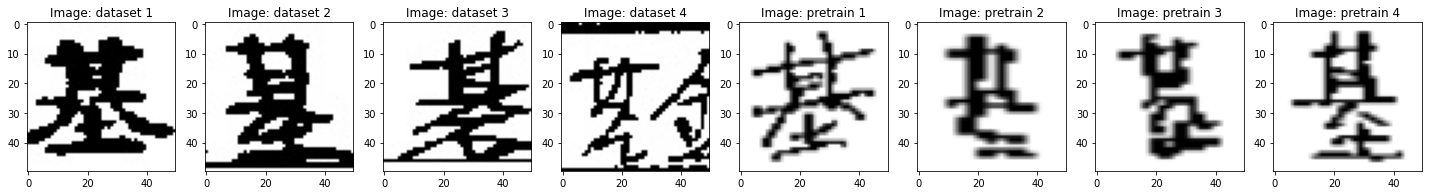

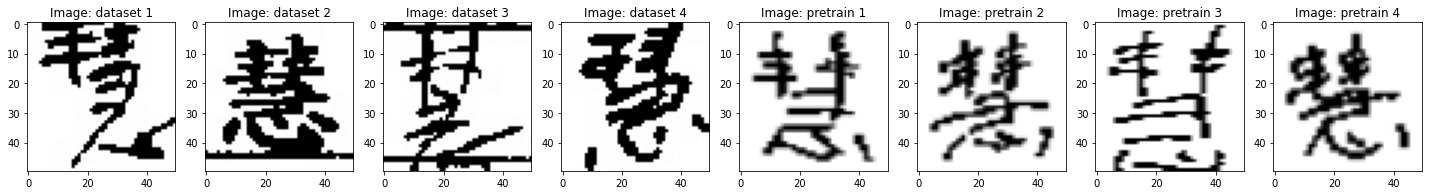

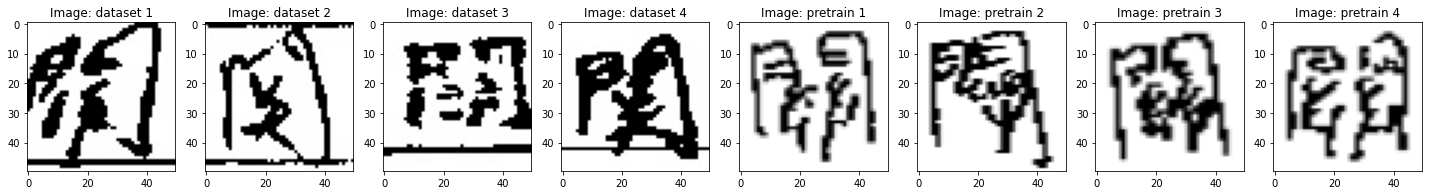

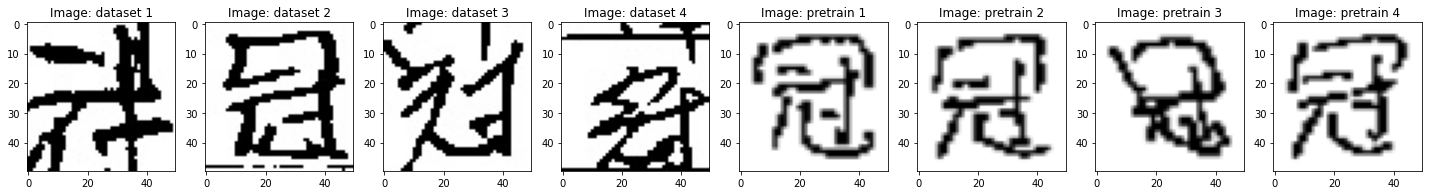

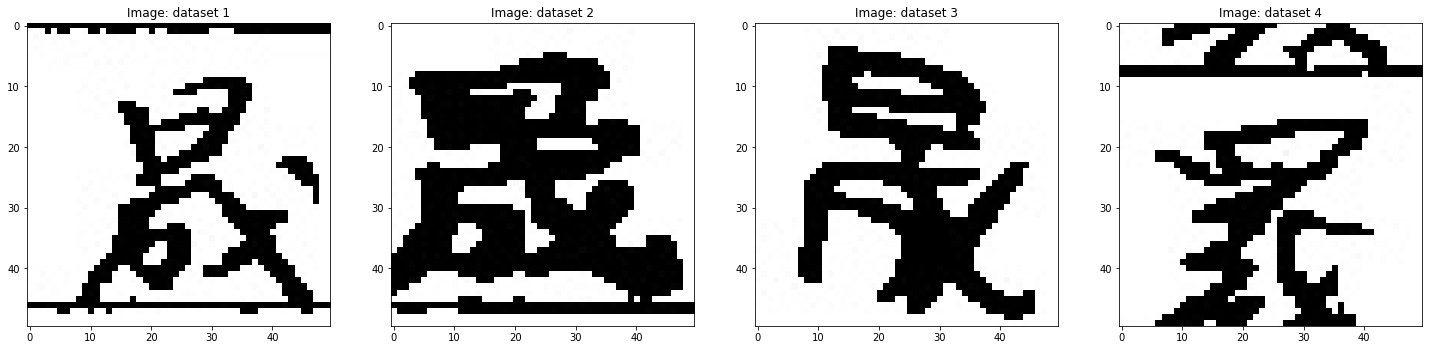

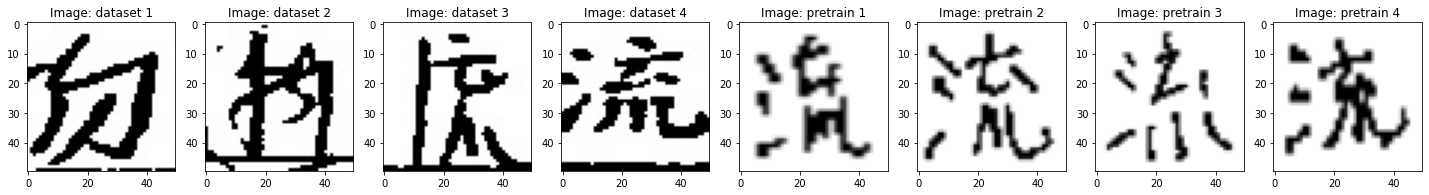

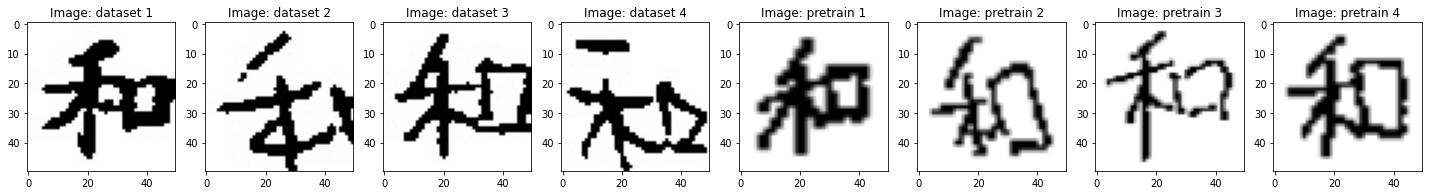

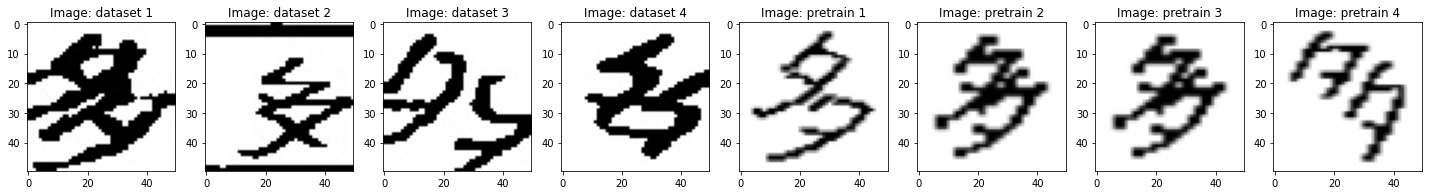

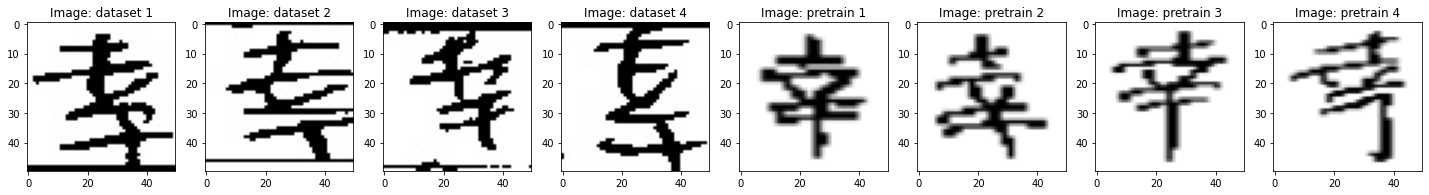

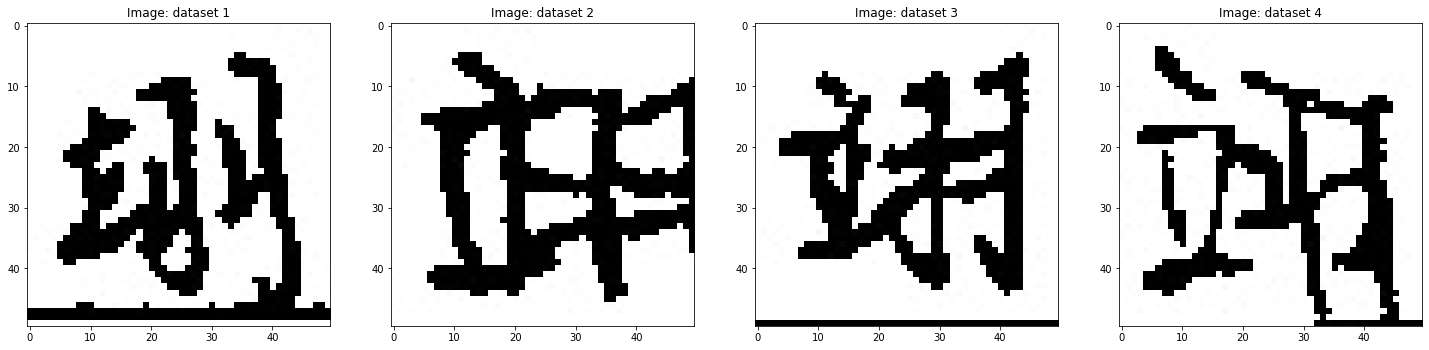

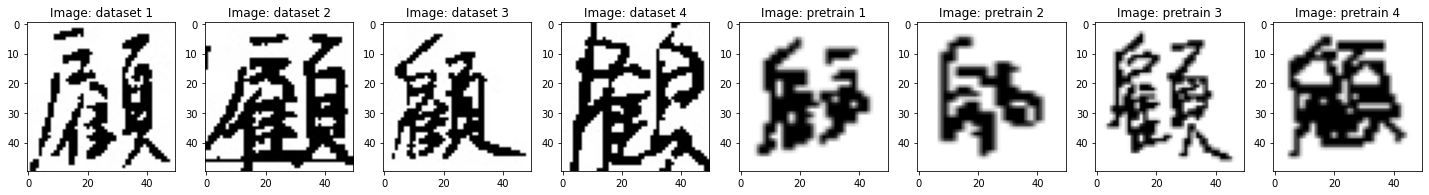

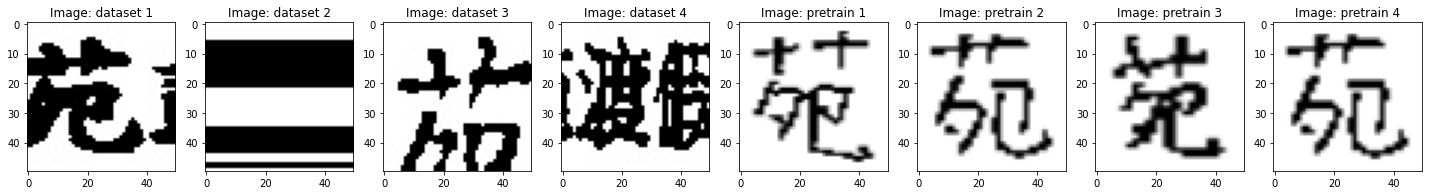

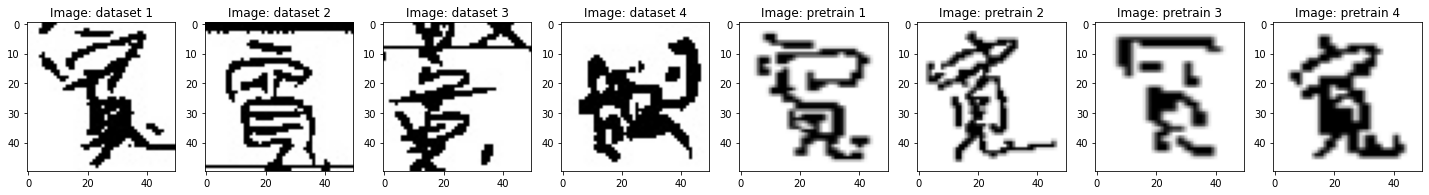

In [8]:
for wid, word in enumerate(dataset_img.keys()):
    pretrain_cnt = min(4, len(pretrain_img[word]))
    dataset_cnt = min(4, len(dataset_img[word]))
    imgs, titles = [], []
    for idx in range(dataset_cnt):
        img = cv2.imread(dataset_img[word][idx], 1)
        imgs.append(img)
        titles.append('dataset {}'.format(idx+1))
    for idx in range(pretrain_cnt):
        img = cv2.imread(pretrain_img[word][idx], 1)
        imgs.append(img)
        titles.append('pretrain {}'.format(idx+1))

    fig, axs = plt.subplots(nrows=1, ncols= pretrain_cnt + dataset_cnt, figsize=(25,25))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(imgs[i])
        plt.title('Image: {}'.format(titles[i]))

    plt.show()
    if wid == 20: break

50695_來.jpg :  0.008693978190422058 pred as  卓
(67, 65, 3)


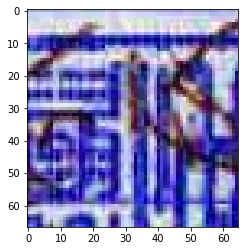


54516_兆.jpg :  0.014159160666167736 pred as  科
(67, 44, 3)


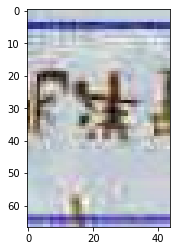


37239_永.jpg :  0.014426160603761673 pred as  佩
(67, 192, 3)


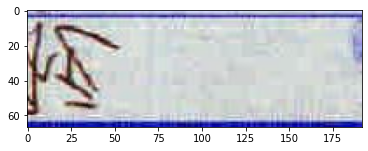


47007_敬.jpg :  0.015256115235388279 pred as  院
(67, 23, 3)


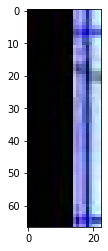


26787_聰.jpg :  0.015504591166973114 pred as  紀
(67, 14, 3)


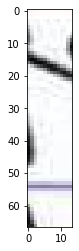


15519_隆.jpg :  0.015647152438759804 pred as  院
(67, 32, 3)


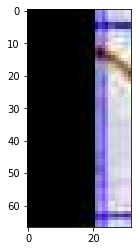


43_臺.jpg :  0.015806207433342934 pred as  院
(67, 500, 3)


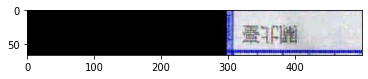


57517_冷.jpg :  0.01657765731215477 pred as  建
(67, 33, 3)


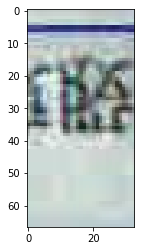


19083_自.jpg :  0.01666136644780636 pred as  格
(67, 43, 3)


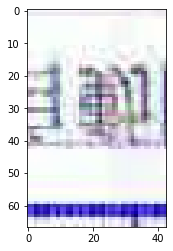


11624_景.jpg :  0.017026402056217194 pred as  款
(67, 187, 3)


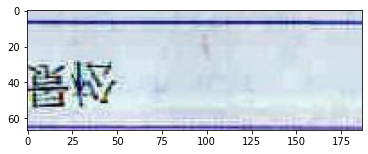


35611_偉.jpg :  0.017071394249796867 pred as  院
(67, 57, 3)


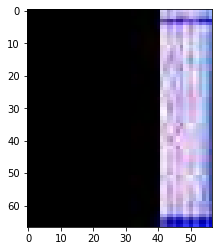


61026_製.jpg :  0.01718914695084095 pred as  格
(67, 67, 3)


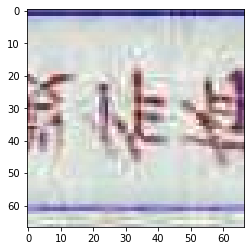


48606_基.jpg :  0.01724356971681118 pred as  款
(67, 136, 3)


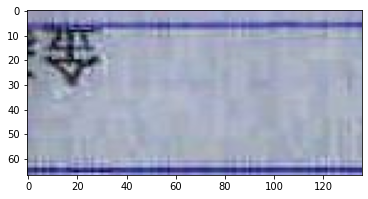


55191_京.jpg :  0.017263172194361687 pred as  建
(67, 45, 3)


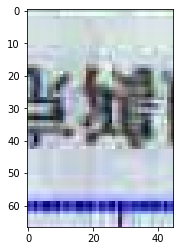


40704_家.jpg :  0.017449459061026573 pred as  來
(67, 147, 3)


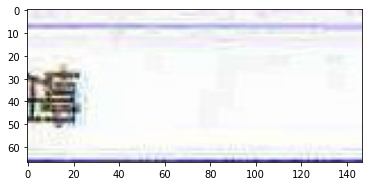


40816_靖.jpg :  0.01749812439084053 pred as  療
(67, 30, 3)


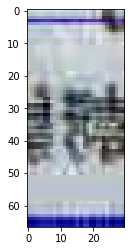


14124_院.jpg :  0.01755697652697563 pred as  款
(67, 39, 3)


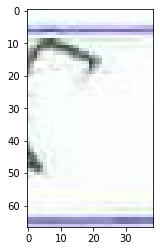


21312_鴻.jpg :  0.017639605328440666 pred as  工
(67, 68, 3)


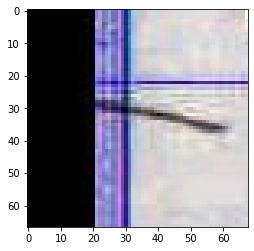


497_內.jpg :  0.01775161735713482 pred as  欽
(67, 26, 3)


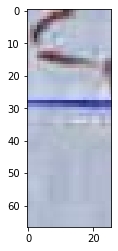


35523_姿.jpg :  0.01785767637193203 pred as  月
(67, 138, 3)


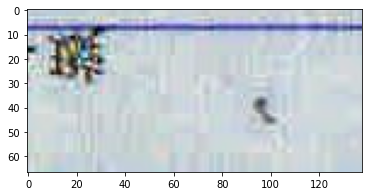


45777_雪.jpg :  0.017876941710710526 pred as  款
(67, 182, 3)


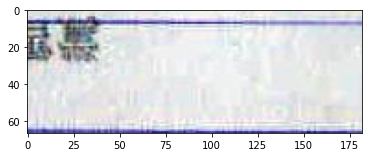


4491_涵.jpg :  0.017881378531455994 pred as  款
(67, 150, 3)


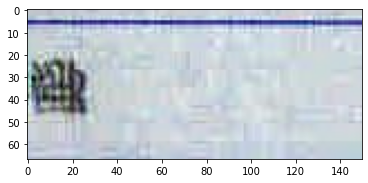


51434_御.jpg :  0.017897093668580055 pred as  銀
(67, 17, 3)


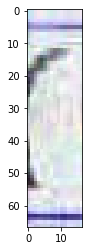


20841_貝.jpg :  0.018089888617396355 pred as  築
(67, 40, 3)


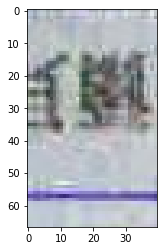


7470_拓.jpg :  0.018103063106536865 pred as  款
(67, 104, 3)


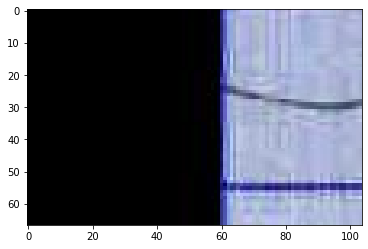


16687_紙.jpg :  0.018127111718058586 pred as  靖
(67, 37, 3)


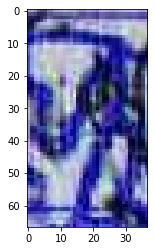


12240_裕.jpg :  0.018322668969631195 pred as  會
(67, 40, 3)


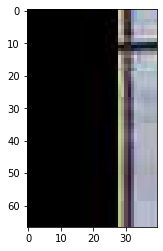

KeyboardInterrupt: Interrupted by user

In [14]:
with open('./false_cases', 'rb') as f:
    false_cases = np.load(f)
    
path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition'
false_cases = false_cases[::-1]

for c in false_cases:
    file_id = c[0]
    print(c[0], ': ', c[1], 'pred as ', c[2])
    im = cv2.imread(os.path.join(path, 'Origin', file_id), 1)[::-1]
    print(im.shape)
    plt.imshow(im)
    plt.show()
    input()

13210 55594


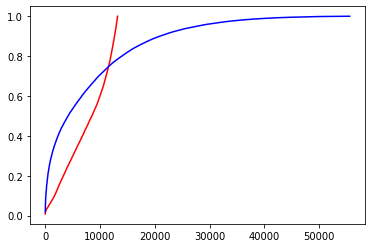

In [25]:
with open('./false_cases', 'rb') as f:
    false_cases = np.load(f)
with open('./true_cases', 'rb') as f:
    true_cases = np.load(f)

print(len(false_cases), len(true_cases))
false_cases = false_cases[::-1]
plt.plot(range(len(false_cases)), list(map(float, false_cases[:, 1])), 'r')
plt.plot(range(len(true_cases)), list(map(float, true_cases[:, 1])), 'b')
plt.show()

In [68]:
true_use = [c[0] for c in true_cases if float(c[1]) > 0.4]
false_use = [c[0] for c in false_cases if float(c[1]) > 0.6]

word_count = defaultdict(int)
dir_path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition/'

train_use = []
for path in true_use:
    word_count[path[-5]]
    train_use.append(
        {'img_path': os.path.join(dir_path, 'Modified_Thres', path),
         'label': path[-5]
        }
    )
for path in false_use:
    word_count[path[-5]]
    train_use.append(
        {'img_path': os.path.join(dir_path, 'Modified_Thres', path),
         'label': path[-5]
        }
    )
    
print('Having {} words over all {} words'.format(len(word_count), len(word2label)))

total_cnt = len(true_cases) + len(false_cases)

print('Use {} over {} dataset image'.format(len(train_use), total_cnt))

pretrain_cnt = 0
for word in pretrain_img.keys():
    for img_path in pretrain_img[word]:
        train_use.append(
            {'img_path': img_path,
             'label': img_path.split('/')[-1].split('_')[0]
            }
        )
        pretrain_cnt += 1

print("Adding {} images into training data. Get overall {} images of training data".format(pretrain_cnt, len(train_use)))

with open('./combine_dataset.txt', 'w', encoding='utf-8') as f:
    json.dump(train_use, f)

Having 800 words over all 800 words
Use 56500 over 68804 dataset image
Adding 39792 images into training data. Get overall 96292 images of training data


/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition/Modified_Thres/19506_軒.jpg 軒


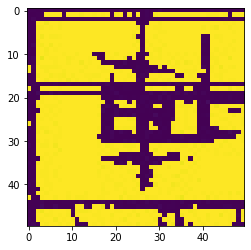

In [ ]:
with open('./combine_dataset.txt', 'r', encoding='utf-8') as f:
    combine_dataset = json.load(f)

for data in combine_dataset:
    img_path = data['img_path']
    label = data['label']
    
    print(img_path, label)
    img = cv2.imread(img_path, 0)[::-1]
    
    plt.imshow(img)
    plt.show()
    
    input()